13522103 - Steven Tjhia

# Design of Experiment

# 0. Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report
import time

# 1. Exploratory Data Analysis

In [2]:
df = pd.read_csv("../dataset/SleepyDriverEEGBrainwave.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


============ Feature Explanation ============

~   attention       : Proprietary measure of mental focus from 0-100

~   meditation      : Proprietary measure of calmness from 0-100

~   delta           : 1-3 Hz of power spectrum

~   theta           : 4-7 Hz of power spectrum

~   lowAlpha        : Lower 8-11 Hz of power spectrum

~   highAlpha       : Higher 8-11 Hz of power spectrum

~   lowBeta         : Lower 12-29 Hz of power spectrum

~   highBeta        : Higher 12-29 Hz of power spectrum)

~   lowGamma        : Lower 30-100 Hz of power spectrum

~   highGamma       : Higher 30-100 Hz of power spectrum

~  classification  : whether driver is sleepy (0: not sleepy, 1: sleepy)


## 1.1 Statistik Dasar Data

### 1.1.1 Fitur Numerik

In [4]:
df.iloc[:,:-1].describe()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma
count,3735.000000,3735.000000,3.735000e+03,3.735000e+03,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3.735000e+03
mean,48.214726,56.577510,5.187714e+05,1.362420e+05,33413.343775,30580.759036,25640.069076,23276.979384,8117.130388,2.087258e+05
std,21.876949,19.066577,5.997837e+05,2.175501e+05,51970.930842,52681.858764,37159.039642,43921.116122,15522.904383,3.297073e+05
min,1.000000,1.000000,2.160000e+02,1.380000e+02,32.000000,9.000000,2.000000,3.000000,6.000000,4.700000e+01
25%,35.000000,43.000000,7.199650e+04,2.347200e+04,7402.000000,6908.500000,6240.000000,4862.000000,2247.000000,5.683000e+03
50%,48.000000,56.000000,2.773820e+05,5.797200e+04,16481.000000,14928.000000,13841.000000,9739.000000,4440.000000,5.719800e+04
75%,63.000000,69.000000,7.780680e+05,1.514855e+05,37721.500000,33147.500000,30236.000000,20796.500000,8813.000000,2.576875e+05
max,100.000000,100.000000,3.598743e+06,3.194358e+06,699008.000000,785947.000000,595549.000000,443589.000000,289281.000000,2.328370e+06


### 1.1.2 Fitur Kategorikal

In [5]:
value_counts = df['classification'].value_counts()
print('-'*50)
print("Unique values count:", value_counts.shape[0])
print('-'*50)
print("Data count for each unique value:")
print(value_counts)
print('-'*50)

--------------------------------------------------
Unique values count: 2
--------------------------------------------------
Data count for each unique value:
classification
0    2135
1    1600
Name: count, dtype: int64
--------------------------------------------------


#### Penjelasan
==> Data kategorikal hanya bernilai antara 0 atau 1 (0: tidak mengantuk, 1: mengantuk)

## 1.2 Persebaran Data

### Functions

In [6]:
def showDistribution(feature):
    sns.histplot(df[feature], kde=True)
    plt.title('Distribution of '+feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

def calculateSkewness(feature):
    print("Skewness:", df[feature].skew())

def calculateKurtosis(feature):
  print("Kurtosis:", df[feature].kurt())
  
def isNormalDist(feature):
    # 95% confidence level
    _, p_value = shapiro(df[feature])
    result = 'No Normal Distribution' if p_value < 0.05 else 'Normal Distribution'
    print(f'p-value = {p_value} ==> {result}')
    
def explainDistribution(feature):
    showDistribution(feature)
    calculateSkewness(feature)
    calculateKurtosis(feature)
    isNormalDist(feature)

### ~ Fitur attention

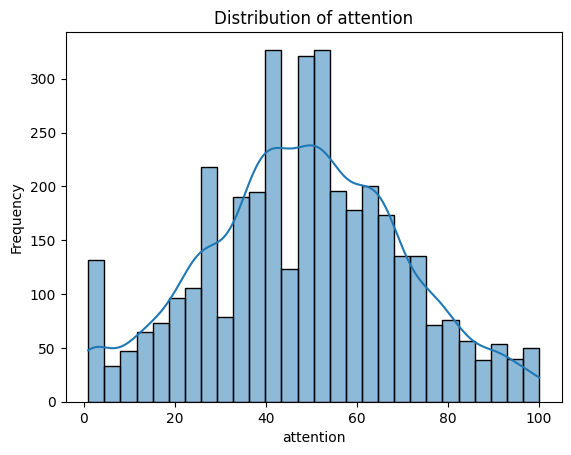

Skewness: -0.010961932483724107
Kurtosis: -0.3313193816942537
p-value = 2.2000726324692062e-13 ==> No Normal Distribution


In [7]:
explainDistribution("attention")

### ~ Fitur meditation

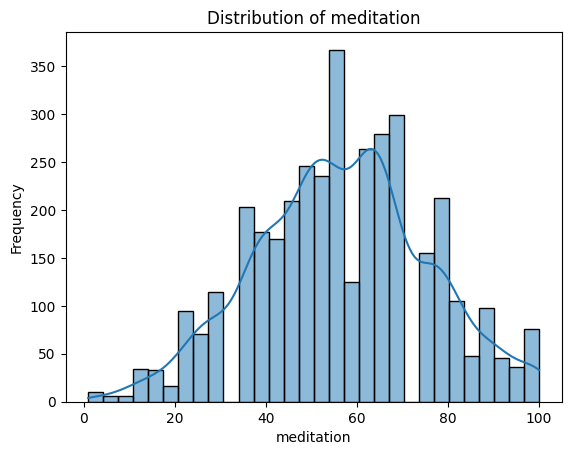

Skewness: -0.029182872935427623
Kurtosis: -0.24196287271136718
p-value = 1.0664350926157289e-09 ==> No Normal Distribution


In [8]:
explainDistribution("meditation")

### ~ Fitur delta

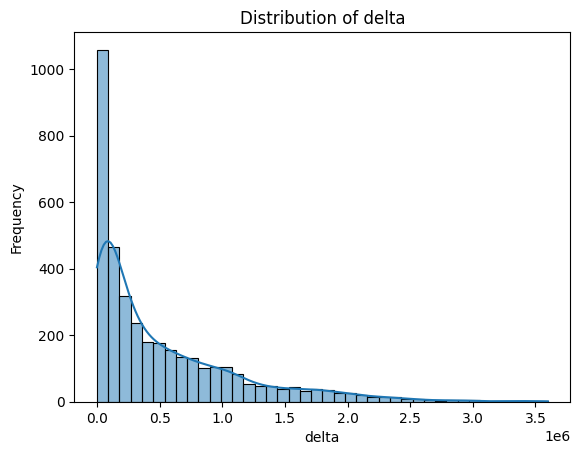

Skewness: 1.6574138220352395
Kurtosis: 2.7943618917122723
p-value = 2.1873405951586786e-55 ==> No Normal Distribution


In [9]:
explainDistribution("delta")

### ~ Fitur theta

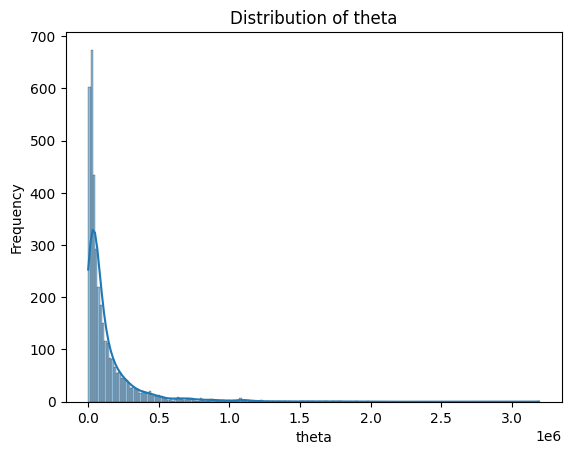

Skewness: 4.0300497318149135
Kurtosis: 25.03152881338148
p-value = 6.214388169491897e-70 ==> No Normal Distribution


In [10]:
explainDistribution("theta")

### ~ Fitur lowAlpha

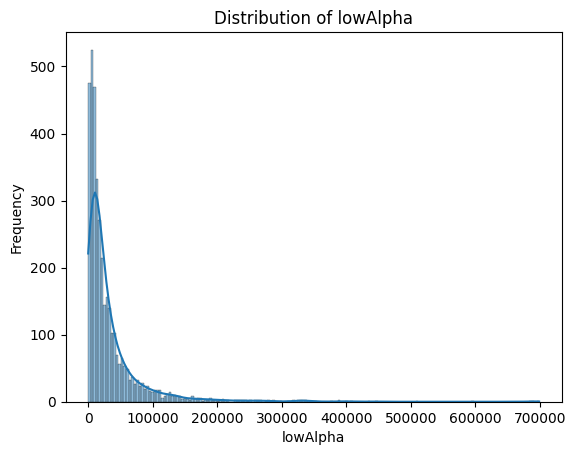

Skewness: 4.852354151560111
Kurtosis: 37.221024402689906
p-value = 7.551859281486464e-71 ==> No Normal Distribution


In [11]:
explainDistribution("lowAlpha")

### ~ Fitur highAlpha

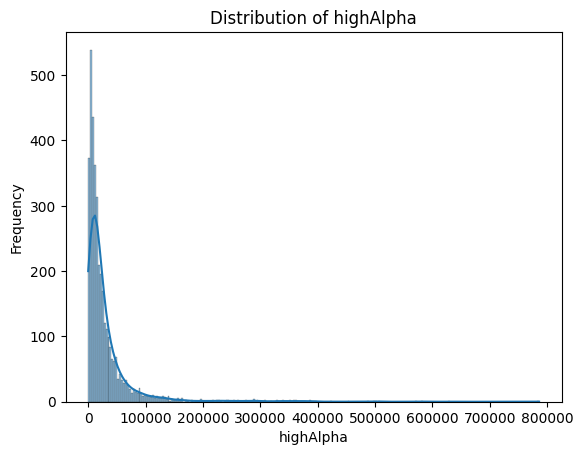

Skewness: 5.464175094870432
Kurtosis: 41.974265662517524
p-value = 6.289947172318242e-74 ==> No Normal Distribution


In [12]:
explainDistribution("highAlpha")

### ~ Fitur lowBeta

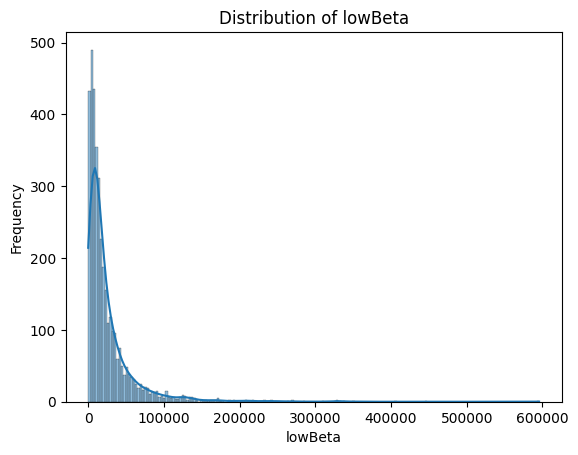

Skewness: 4.710649652307607
Kurtosis: 37.11274460267788
p-value = 1.272825642685298e-69 ==> No Normal Distribution


In [13]:
explainDistribution("lowBeta")

### ~ Fitur highBeta

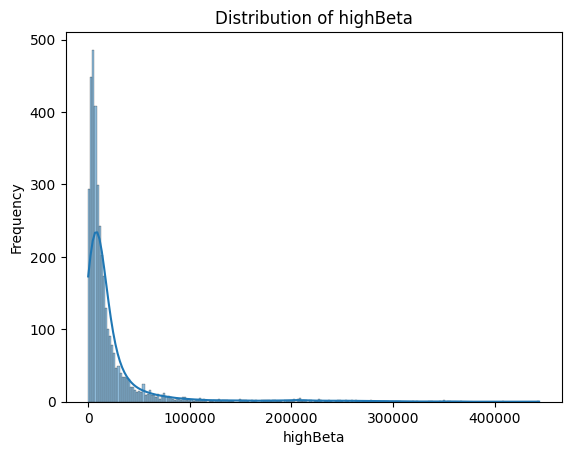

Skewness: 4.411688111134966
Kurtosis: 22.76543959794245
p-value = 1.6207800334208476e-74 ==> No Normal Distribution


In [14]:
explainDistribution("highBeta")

### ~ Fitur lowGamma

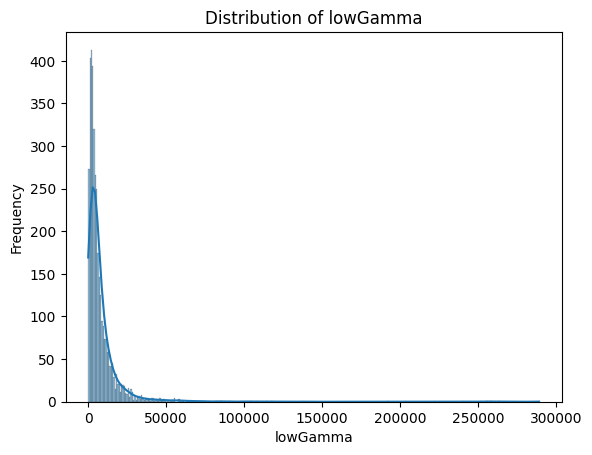

Skewness: 9.905019769707819
Kurtosis: 138.98216700996247
p-value = 4.781653445008667e-78 ==> No Normal Distribution


In [15]:
explainDistribution("lowGamma")

### ~ Fitur highGamma

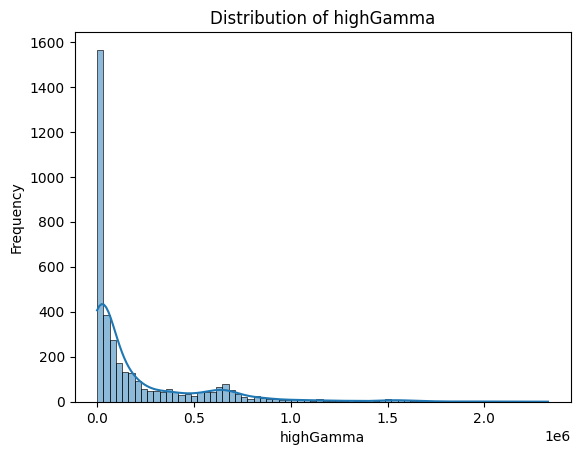

Skewness: 2.3936009344685094
Kurtosis: 6.698709026051775
p-value = 5.885860225827984e-65 ==> No Normal Distribution


In [16]:
explainDistribution("highGamma")

### ~ Fitur classification

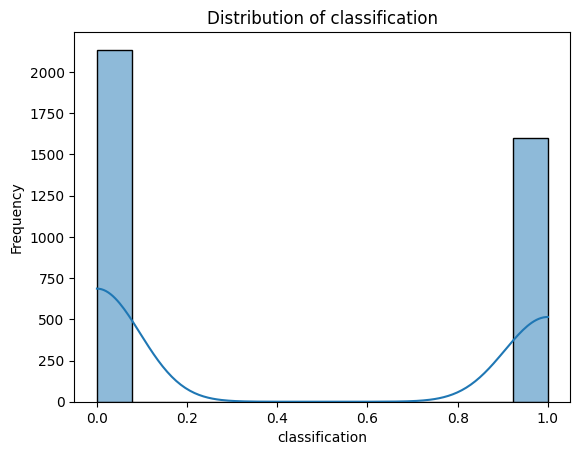

Skewness: 0.28958050488296116
Kurtosis: -1.9171700152125388
p-value = 2.7422947437855238e-67 ==> No Normal Distribution


In [17]:
explainDistribution("classification")

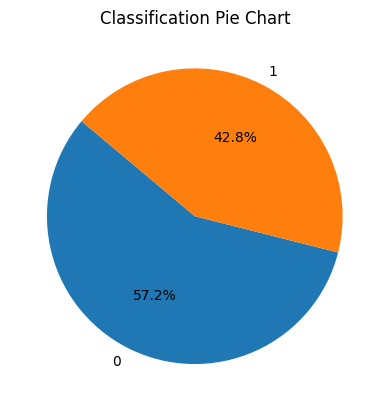

In [18]:
groupby_classification_count = value_counts
plt.pie(groupby_classification_count, labels=[0,1], autopct='%1.1f%%', startangle=140)
plt.title('Classification Pie Chart')
plt.show()

## 1.3 Pengecekan Outlier

### Functions

In [19]:
def showBoxplot(feature):
    sns.boxplot(df[feature])

### ~ Fitur attention

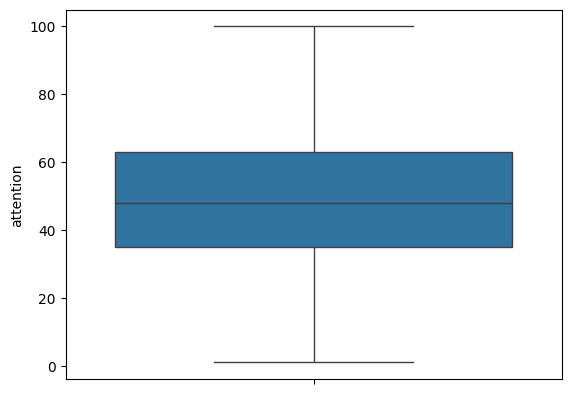

In [20]:
showBoxplot("attention")

### ~ Fitur meditation

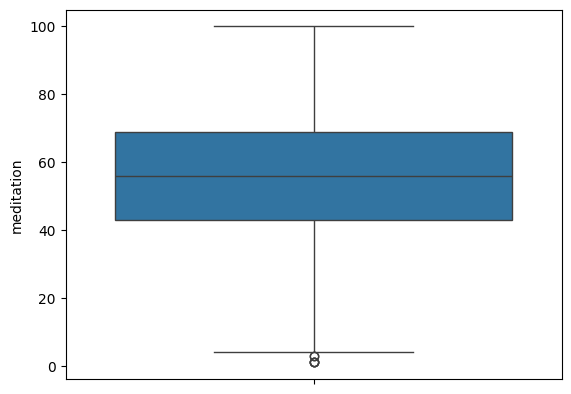

In [21]:
showBoxplot("meditation")

### ~ Fitur delta

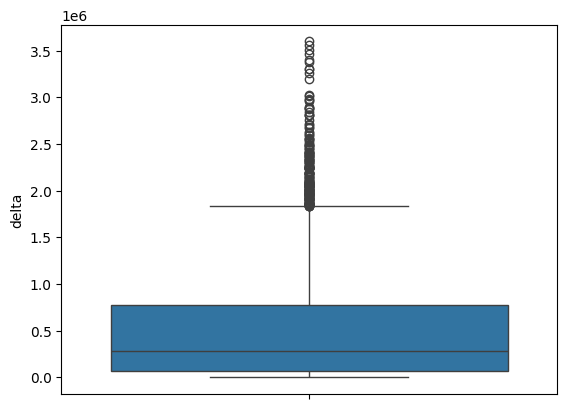

In [22]:
showBoxplot("delta")

### ~ Fitur theta

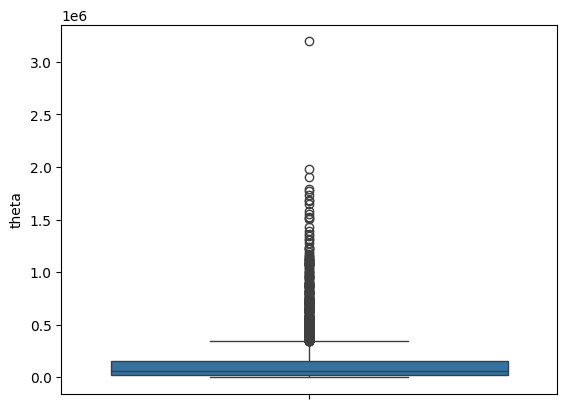

In [23]:
showBoxplot("theta")

### ~ Fitur lowAlpha

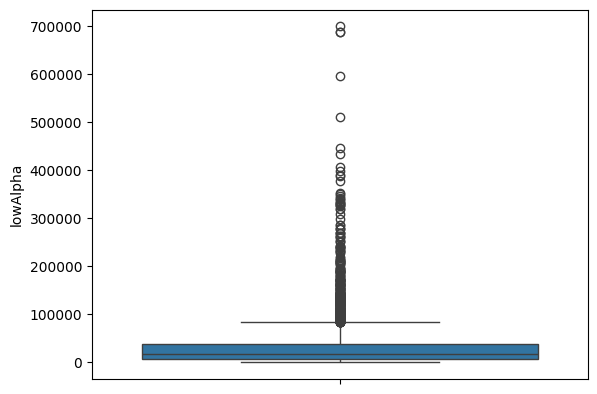

In [24]:
showBoxplot("lowAlpha")

### ~ Fitur highAlpha

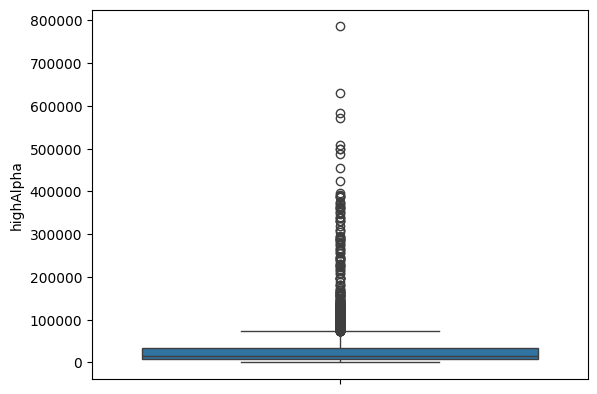

In [25]:
showBoxplot("highAlpha")

### ~ Fitur lowBeta

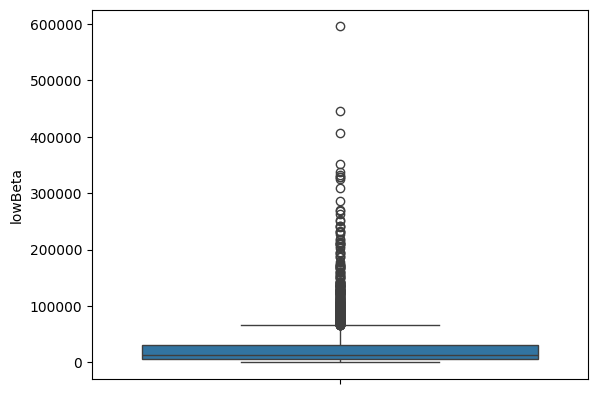

In [26]:
showBoxplot("lowBeta")

### ~ Fitur highBeta

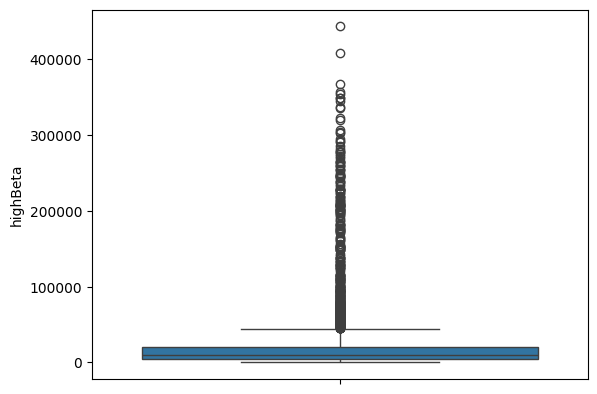

In [27]:
showBoxplot("highBeta")

### ~ Fitur lowGamma

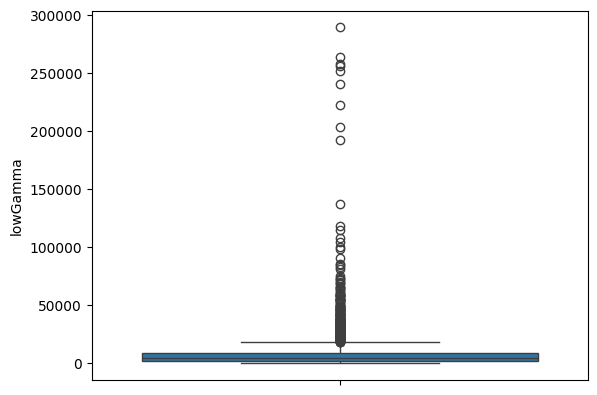

In [28]:
showBoxplot("lowGamma")

### ~ Fitur highGamma

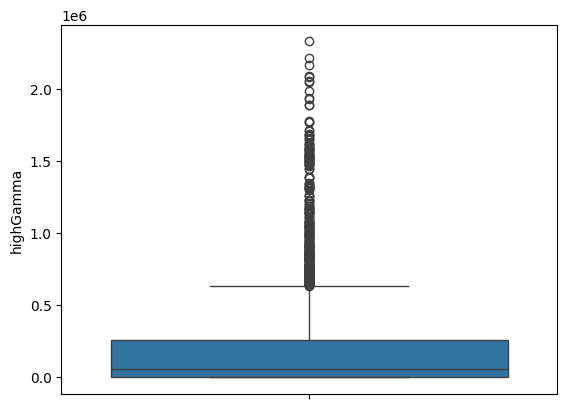

In [29]:
showBoxplot("highGamma")

### ~ Fitur classification

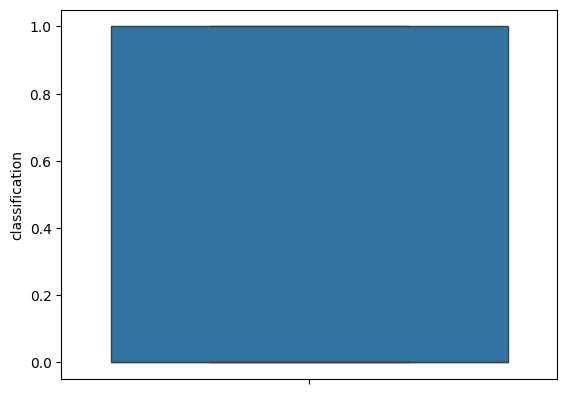

In [30]:
showBoxplot("classification")

## 1.4 Pengecekan Null Value

### Functions

In [31]:
def countNullValue(feature):
    count_null_values = df[feature].isnull().sum()
    print(f'[{feature}] : {count_null_values}')

### Check Null

In [32]:
columns = df.columns
print("Number of null values for each feature")
for column in columns:
    countNullValue(column)

Number of null values for each feature
[attention] : 0
[meditation] : 0
[delta] : 0
[theta] : 0
[lowAlpha] : 0
[highAlpha] : 0
[lowBeta] : 0
[highBeta] : 0
[lowGamma] : 0
[highGamma] : 0
[classification] : 0


## 1.5 Pengecekan Baris Duplikat

### Functions

In [33]:
def countDuplicatedRows(dataframe):
    print(f"Number of duplicated rows: {dataframe.duplicated().sum()}")

### Check Duplicated Rows

In [34]:
countDuplicatedRows(df)

Number of duplicated rows: 0


## 1.6 Korelasi  (Spearman)

======= Intro =======

Karena tidak ada fitur yang terdistribusi normal, maka metode yang digunakan untuk korelasi ini adalah Spearman.

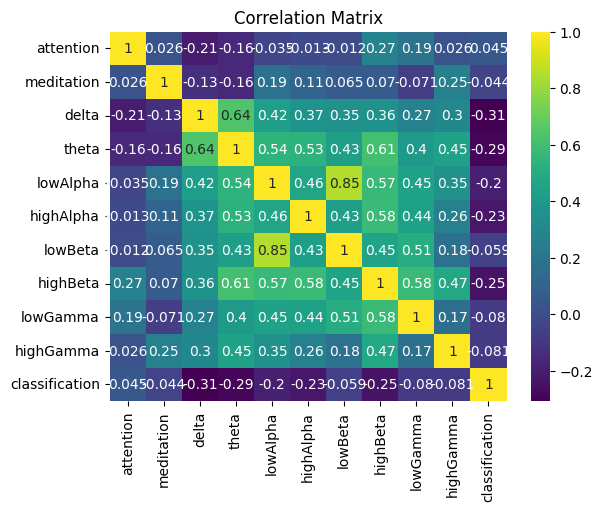

In [35]:
correlation_matrix = df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

======== Penjelasan Singkat ========

Pada matriks korelasi dapat terlihat bahwa fitur 'lowBeta' berkorelasi positif dengan fitur 'lowAlpha'.

# 2. Pre-processing

## 2.1 Data Cleaning

====== Intro ======

Setelah dilakukan pengecekan nilai yang hilang dan pengecekan baris yang duplikat pada bagian EDA, dapat dipastikan bahwa tidak terdapat nilai yang hilang ataupun baris yang duplikat tetapi beberapa fitur masih ada yang memiliki outlier sehingga perlu dilakukan pembersihan outlier.

### Functions

In [36]:
def removeOutlier(dataframe, feature):
    upper_limit = dataframe[feature].mean() + 3*dataframe[feature].std()
    lower_limit = dataframe[feature].mean() - 3*dataframe[feature].std()
    
    new_dataframe = dataframe.loc[(dataframe[feature] <= upper_limit) & (dataframe[feature] >= lower_limit)]
    print("="*15)
    print(f"Feature [{feature}]")
    print("Before removing outliers:", len(dataframe))
    print("After removing outliers:",len(new_dataframe))
    outliers = len(dataframe)-len(new_dataframe)
    print("Outliers:", outliers)
    
    return (new_dataframe, outliers)

### Remove Outliers

In [37]:
columns = df.columns
df_temp = df
total_outliers = 0

for column in columns:
    df_temp, temp_total_outliers = removeOutlier(df_temp,column)
    total_outliers += temp_total_outliers
    
df_processed = df_temp
print("="*20)
print("Total outliers:", total_outliers)

Feature [attention]
Before removing outliers: 3735
After removing outliers: 3735
Outliers: 0
Feature [meditation]
Before removing outliers: 3735
After removing outliers: 3735
Outliers: 0
Feature [delta]
Before removing outliers: 3735
After removing outliers: 3672
Outliers: 63
Feature [theta]
Before removing outliers: 3672
After removing outliers: 3581
Outliers: 91
Feature [lowAlpha]
Before removing outliers: 3581
After removing outliers: 3513
Outliers: 68
Feature [highAlpha]
Before removing outliers: 3513
After removing outliers: 3457
Outliers: 56
Feature [lowBeta]
Before removing outliers: 3457
After removing outliers: 3372
Outliers: 85
Feature [highBeta]
Before removing outliers: 3372
After removing outliers: 3300
Outliers: 72
Feature [lowGamma]
Before removing outliers: 3300
After removing outliers: 3235
Outliers: 65
Feature [highGamma]
Before removing outliers: 3235
After removing outliers: 3204
Outliers: 31
Feature [classification]
Before removing outliers: 3204
After removing out

## 2.2 Data Transformation

======= Intro =======

Karena data yang digunakan kebanyakan tidak berdistribusi normal, maka untuk standardisasinya akan menggunakan Robust Standardization.

### Split Data

In [38]:
X = df_processed.drop(['classification'], axis = 1)
y = df_processed["classification"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True, stratify = y)

### Robust Scaler

In [39]:
robust_scaler = RobustScaler(with_centering=True, with_scaling=True)
X_train_robust_standardized = pd.DataFrame(robust_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_robust_standardized = pd.DataFrame(robust_scaler.fit_transform(X_test), columns=X_test.columns)

In [40]:
X_train.describe()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma
count,2563.000000,2563.000000,2.563000e+03,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000
mean,47.551307,56.420601,4.094600e+05,82642.340226,21603.944206,19720.228638,18640.723761,11966.660164,5647.513851,140926.317987
std,21.876472,18.881555,4.750804e+05,97557.828290,22135.758477,20096.242089,18360.659961,12089.299265,5271.163584,203607.129557
min,1.000000,1.000000,2.160000e+02,138.000000,32.000000,9.000000,2.000000,3.000000,6.000000,47.000000
25%,34.000000,44.000000,5.823150e+04,20632.000000,6455.000000,6183.000000,5537.000000,4326.500000,1984.500000,4288.000000
50%,48.000000,56.000000,2.149140e+05,45473.000000,13896.000000,13102.000000,12502.000000,7939.000000,3945.000000,46174.000000
75%,63.000000,69.000000,6.121635e+05,106595.500000,29665.000000,25814.000000,25095.000000,14908.000000,7431.000000,175649.500000
max,100.000000,100.000000,2.239702e+06,739798.000000,145248.000000,129424.000000,94846.000000,82091.000000,28648.000000,820105.000000


In [41]:
X_test.describe()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma
count,641.000000,641.000000,6.410000e+02,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,49.185647,56.734789,4.423015e+05,82371.586583,21876.436817,19864.390016,18241.003120,12571.659906,6003.960998,142344.892356
std,19.820953,18.496491,5.174306e+05,98666.033736,22101.782776,19136.261430,17360.670895,12324.379255,5369.669785,206984.734427
min,1.000000,3.000000,1.730000e+03,2467.000000,569.000000,229.000000,480.000000,374.000000,96.000000,172.000000
25%,37.000000,44.000000,5.844300e+04,22172.000000,7234.000000,6646.000000,6391.000000,4690.000000,2290.000000,4186.000000
50%,51.000000,56.000000,2.220100e+05,44551.000000,13825.000000,13361.000000,12681.000000,8594.000000,4346.000000,41570.000000
75%,63.000000,69.000000,7.071720e+05,102103.000000,29257.000000,27858.000000,23932.000000,16667.000000,8135.000000,186960.000000
max,100.000000,100.000000,2.311030e+06,714762.000000,145396.000000,130231.000000,94400.000000,79275.000000,28542.000000,812943.000000


## 2.3 Feature Selection

## 2.4 Dimensionality Reduction

## 2.5 Balancing Target Feature

### SMOTE

In [42]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_robust_standardized, y_train)

### Check Proportion

In [43]:
y_train_smote.value_counts(normalize = True)

classification
0    0.5
1    0.5
Name: proportion, dtype: float64

# 3. Modelling and Validation

In [44]:
X_train_final = X_train_smote
y_train_final = y_train_smote

X_test_final = X_test_robust_standardized
y_test_final = y_test

X_kfold = pd.concat([X_train_final, X_test_final])
y_kfold = pd.concat([y_train_final, y_test_final])

## 3.1 [Bagian 2] Supervised Learning

### 3.1.1 K-Nearest-Neighbors

#### ~ [KNN] From Scratch

In [53]:
from supervised_learning.knn import *

start_time_knn_scratch = time.time()

knn_scratch = KNN(k=2, distance_metric="euclidean")
knn_scratch.fit(X_train_final, y_train_final)
y_predict_knn_scratch = knn_scratch.predict(X_test_final)

end_time_knn_scratch = time.time()
exec_time_knn_scratch = end_time_knn_scratch - start_time_knn_scratch

print("Exec Time:", exec_time_knn_scratch, "s")

Exec Time: 9.465933561325073 s


#### ~ [KNN] Library

In [54]:
from sklearn.neighbors import KNeighborsClassifier

start_time_knn_library = time.time()

knn_library = KNeighborsClassifier(n_neighbors=2)
knn_library.fit(X_train_final, y_train_final)
y_predict_knn_library = knn_library.predict(X_test_final)

end_time_knn_library = time.time()
exec_time_knn_library = end_time_knn_library - start_time_knn_library

print("Exec Time:", exec_time_knn_library, "s")

Exec Time: 0.05199742317199707 s


#### ~ [KNN] Validation

*split holdout 80-20 sudah dilakukan pada tahap pre-processing

In [56]:
# [KNN] Scratch
print("="*8, "[Scratch] KNN Validation","="*8,)
print()

print("="*3, "Holdout 80-20","="*3,)
accuracy_knn_scratch = accuracy_score(y_test_final, y_predict_knn_scratch)
print("Accuracy:", accuracy_knn_scratch)

report_knn_scratch = classification_report(y_test_final, y_predict_knn_scratch)
print("Classification Report:\n", report_knn_scratch)

print("="*3, "K-Fold, k=5","="*3,)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_gnb_scratch = []
for train_index, test_index in kf.split(X_kfold):
    X_train, X_test = X_kfold.iloc[train_index], X_kfold.iloc[test_index] 

    y_train, y_test = y_kfold.iloc[train_index], y_kfold.iloc[test_index]

    knn_scratch.fit(X_train, y_train)
    y_pred = knn_scratch.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_gnb_scratch.append(accuracy)

avg_acc_gnb_scratch = np.mean(accuracies_gnb_scratch)
print("K-Fold Cross-Validation Average Accuracy:", avg_acc_gnb_scratch)

======== [Scratch] KNN Validation ========

=== Holdout 80-20 ===
Accuracy: 0.7020280811232449
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.70       345
           1       0.65      0.76      0.70       296

    accuracy                           0.70       641
   macro avg       0.71      0.71      0.70       641
weighted avg       0.71      0.70      0.70       641

=== K-Fold, k=5 ===
K-Fold Cross-Validation Average Accuracy: 0.7279957550030323


In [57]:
# [KNN] Library
print("="*8, "[Library] KNN Validation","="*8,)
print()

print("="*3, "Holdout 80-20","="*3,)
accuracy_knn_library = accuracy_score(y_test_final, y_predict_knn_library)
print("Accuracy:", accuracy_knn_library)

report_knn_library = classification_report(y_test_final, y_predict_knn_library)
print("Classification Report:\n", report_knn_library)

print("="*3, "K-Fold, k=5","="*3,)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_gnb_library = []
for train_index, test_index in kf.split(X_kfold):
    X_train, X_test = X_kfold.iloc[train_index], X_kfold.iloc[test_index] 

    y_train, y_test = y_kfold.iloc[train_index], y_kfold.iloc[test_index]

    knn_library.fit(X_train, y_train)
    y_pred = knn_library.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_gnb_library.append(accuracy)

avg_acc_gnb_library = np.mean(accuracies_gnb_library)
print("K-Fold Cross-Validation Average Accuracy:", avg_acc_gnb_library)

======== [Library] KNN Validation ========

=== Holdout 80-20 ===
Accuracy: 0.7254290171606864
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76       345
           1       0.74      0.62      0.68       296

    accuracy                           0.73       641
   macro avg       0.73      0.72      0.72       641
weighted avg       0.73      0.73      0.72       641

=== K-Fold, k=5 ===
K-Fold Cross-Validation Average Accuracy: 0.7191523000952958


### 3.1.2 Logistic Regression

#### ~ [LogReg] From Scratch

In [55]:
from supervised_learning.logistic_regression import *

start_time_logReg_scratch = time.time()

logReg_scratch = LogisticRegression(learning_rate=0.1, n_iteration=100, regularization="l1", lambd=0.1)
logReg_scratch.fit(X_train_final, y_train_final)
y_pred_logReg_scratch = logReg_scratch.predict(X_test_final)

end_time_logReg_scratch = time.time()
exec_time_logReg_scratch = end_time_logReg_scratch - start_time_logReg_scratch

print("Exec Time:", exec_time_logReg_scratch, "s")

Exec Time: 0.019998788833618164 s


#### ~ [LogReg] Library

In [54]:
from sklearn.linear_model import LogisticRegression as LogRegSklearn

start_time_logReg_library = time.time()

logReg_library = LogRegSklearn(penalty='l1', C=1/0.1, max_iter=100, solver='liblinear')
logReg_library.fit(X_train_final, y_train_final)
y_pred_logReg_library = logReg_library.predict(X_test_final)

end_time_logReg_library = time.time()
exec_time_logReg_library = end_time_logReg_library - start_time_logReg_library

print("Exec Time:", exec_time_logReg_library, "s")

Exec Time: 0.015011787414550781 s


#### ~ [LogReg] Validation

In [52]:
# [logReg] Scratch
print("="*8, "[Scratch] LogReg Validation","="*8,)
print()

print("="*3, "Holdout 80-20","="*3,)
accuracy_logReg_scratch = accuracy_score(y_test_final, y_pred_logReg_scratch)
print("Accuracy:", accuracy_logReg_scratch)

report_logReg_scratch = classification_report(y_test_final, y_pred_logReg_scratch)
print("Classification Report:\n", report_logReg_scratch)

print("="*3, "K-Fold, k=5","="*3,)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_logReg_scratch = []
for train_index, test_index in kf.split(X_kfold):
    X_train, X_test = X_kfold.iloc[train_index], X_kfold.iloc[test_index] 

    y_train, y_test = y_kfold.iloc[train_index], y_kfold.iloc[test_index]

    logReg_scratch.fit(X_train, y_train)
    y_pred = logReg_scratch.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_logReg_scratch.append(accuracy)

avg_acc_logReg_scratch = np.mean(accuracies_logReg_scratch)
print("K-Fold Cross-Validation Average Accuracy:", avg_acc_logReg_scratch)

======== [Scratch] LogReg Validation ========

=== Holdout 80-20 ===
Accuracy: 0.6770670826833073
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.68       345
           1       0.63      0.74      0.68       296

    accuracy                           0.68       641
   macro avg       0.68      0.68      0.68       641
weighted avg       0.69      0.68      0.68       641

=== K-Fold, k=5 ===
K-Fold Cross-Validation Average Accuracy: 0.6682430910508532


In [56]:
# [logReg] Library
print("="*8, "[Library] LogReg Validation","="*8,)
print()

print("="*3, "Holdout 80-20","="*3,)
accuracy_logReg_library = accuracy_score(y_test_final, y_pred_logReg_library)
print("Accuracy:", accuracy_logReg_library)

report_logReg_library = classification_report(y_test_final, y_pred_logReg_library)
print("Classification Report:\n", report_logReg_library)

print("="*3, "K-Fold, k=5","="*3,)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_logReg_library = []
for train_index, test_index in kf.split(X_kfold):
    X_train, X_test = X_kfold.iloc[train_index], X_kfold.iloc[test_index] 

    y_train, y_test = y_kfold.iloc[train_index], y_kfold.iloc[test_index]

    logReg_library.fit(X_train, y_train)
    y_pred = logReg_library.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_logReg_library.append(accuracy)

avg_acc_logReg_library = np.mean(accuracies_logReg_library)
print("K-Fold Cross-Validation Average Accuracy:", avg_acc_logReg_library)

======== [Library] LogReg Validation ========

=== Holdout 80-20 ===
Accuracy: 0.6755070202808112
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.59      0.66       345
           1       0.62      0.77      0.69       296

    accuracy                           0.68       641
   macro avg       0.69      0.68      0.68       641
weighted avg       0.69      0.68      0.67       641

=== K-Fold, k=5 ===
K-Fold Cross-Validation Average Accuracy: 0.6700073637702504


### 3.1.3 Gaussian Naive Bayes

#### ~ [GNB] From Scratch

In [48]:
from supervised_learning.gaussian_naive_bayes import *

start_time_gng_scratch = time.time()

gnb_scratch = GaussianNaiveBayes()
gnb_scratch.fit(X_train_final, y_train_final)
y_pred_gnb_scratch = gnb_scratch.predict(X_test_final)

end_time_gng_scratch = time.time()
exec_time_gng_scratch = end_time_gng_scratch - start_time_gng_scratch

print("Exec Time:", exec_time_gng_scratch, "s")

Exec Time: 0.0910031795501709 s


#### ~ [GNB] Library

In [49]:
from sklearn.naive_bayes import GaussianNB

start_time_gnb_library = time.time()

gnb_library = GaussianNB()
gnb_library.fit(X_train_final, y_train_final)
y_pred_gnb_library = gnb_library.predict(X_test_final)

end_time_gnb_library = time.time()
exec_time_gnb_library = end_time_gnb_library - start_time_gnb_library

print("Exec Time:", exec_time_gnb_library, "s")

Exec Time: 0.004001140594482422 s


#### ~ [GNB] Validation

In [50]:
# [GNB] Scratch
print("="*8, "[Scratch] GNB Validation","="*8,)
print()

print("="*3, "Holdout 80-20","="*3,)
accuracy_gnb_scratch = accuracy_score(y_test_final, y_pred_gnb_scratch)
print("Accuracy:", accuracy_gnb_scratch)

report_gnb_scratch = classification_report(y_test_final, y_pred_gnb_scratch)
print("Classification Report:\n", report_gnb_scratch)

print("="*3, "K-Fold, k=5","="*3,)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_gnb_scratch = []
for train_index, test_index in kf.split(X_kfold):
    X_train, X_test = X_kfold.iloc[train_index], X_kfold.iloc[test_index] 

    y_train, y_test = y_kfold.iloc[train_index], y_kfold.iloc[test_index]

    gnb_scratch.fit(X_train, y_train)
    y_pred = gnb_scratch.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_gnb_scratch.append(accuracy)

avg_acc_gnb_scratch = np.mean(accuracies_gnb_scratch)
print("K-Fold Cross-Validation Average Accuracy:", avg_acc_gnb_scratch)

======== [Scratch] GNB Validation ========

=== Holdout 80-20 ===
Accuracy: 0.6115444617784711
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.42      0.54       345
           1       0.55      0.83      0.66       296

    accuracy                           0.61       641
   macro avg       0.65      0.63      0.60       641
weighted avg       0.66      0.61      0.60       641

=== K-Fold, k=5 ===
K-Fold Cross-Validation Average Accuracy: 0.6105522827687776


In [52]:
# [GNB] Library
print("="*8, "[Library] GNB Validation","="*8,)
print()

print("="*3, "Holdout 80-20","="*3,)
accuracy_gnb_library = accuracy_score(y_test_final, y_pred_gnb_library)
print("Accuracy:", accuracy_gnb_library)

report_gnb_library = classification_report(y_test_final, y_pred_gnb_library)
print("Classification Report:\n", report_gnb_library)

print("="*3, "K-Fold, k=5","="*3,)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_gnb_library = []
for train_index, test_index in kf.split(X_kfold):
    X_train, X_test = X_kfold.iloc[train_index], X_kfold.iloc[test_index] 

    y_train, y_test = y_kfold.iloc[train_index], y_kfold.iloc[test_index]

    gnb_library.fit(X_train, y_train)
    y_pred = gnb_library.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_gnb_library.append(accuracy)

avg_acc_gnb_library = np.mean(accuracies_gnb_library)
print("K-Fold Cross-Validation Average Accuracy:", avg_acc_gnb_library)

======== [Library] GNB Validation ========

=== Holdout 80-20 ===
Accuracy: 0.6115444617784711
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.42      0.54       345
           1       0.55      0.83      0.66       296

    accuracy                           0.61       641
   macro avg       0.65      0.63      0.60       641
weighted avg       0.66      0.61      0.60       641

=== K-Fold, k=5 ===
K-Fold Cross-Validation Average Accuracy: 0.6105522827687776


### 3.1.4 Classification and Regression Tree

#### ~ [CART] From Scratch

In [46]:
from supervised_learning.cart import *

start_time_cart_scratch = time.time()

cart_scratch = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
cart_scratch.fit(X_train_final, y_train_final)
y_pred_cart_scratch = cart_scratch.predict(X_test_final)

end_time_cart_scratch = time.time()
exec_time_cart_scratch = end_time_cart_scratch - start_time_cart_scratch

print("Exec Time:", exec_time_cart_scratch, "s")

Exec Time: 144.03437876701355 s


#### ~ [CART] Library

In [47]:
from sklearn.tree import DecisionTreeClassifier as SklearnCART

start_time_cart_library = time.time()

cart_library = SklearnCART(min_samples_split=3, max_depth=5)
cart_library.fit(X_train_final, y_train_final)
y_pred_cart_library = cart_library.predict(X_test_final)

end_time_cart_library = time.time()
exec_time_cart_library = end_time_cart_library - start_time_cart_library

print("Exec Time:", exec_time_cart_library, "s")


Exec Time: 0.032059669494628906 s


#### ~ [CART] Validation

In [48]:
# [CART] Scratch
print("="*8, "[Scratch] CART Validation","="*8,)
print()

print("="*3, "Holdout 80-20","="*3,)
accuracy_cart_scratch = accuracy_score(y_test_final, y_pred_cart_scratch)
print("Accuracy:", accuracy_cart_scratch)

report_cart_scratch = classification_report(y_test_final, y_pred_cart_scratch)
print("Classification Report:\n", report_cart_scratch)

print("="*3, "K-Fold, k=5","="*3,)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_cart_scratch = []
for train_index, test_index in kf.split(X_kfold):
    X_train, X_test = X_kfold.iloc[train_index], X_kfold.iloc[test_index] 

    y_train, y_test = y_kfold.iloc[train_index], y_kfold.iloc[test_index]

    cart_scratch.fit(X_train, y_train)
    y_pred = cart_scratch.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_cart_scratch.append(accuracy)

avg_acc_cart_scratch = np.mean(accuracies_cart_scratch)
print("K-Fold Cross-Validation Average Accuracy:", avg_acc_cart_scratch)

======== [Scratch] CART Validation ========

=== Holdout 80-20 ===
Accuracy: 0.672386895475819
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.53      0.64       345
           1       0.61      0.83      0.70       296

    accuracy                           0.67       641
   macro avg       0.70      0.68      0.67       641
weighted avg       0.70      0.67      0.67       641

=== K-Fold, k=5 ===
K-Fold Cross-Validation Average Accuracy: 0.7203292038464871


In [50]:
# [CART] Library
print("="*8, "[Library] CART Validation","="*8,)
print()

print("="*3, "Holdout 80-20","="*3,)
accuracy_cart_library = accuracy_score(y_test_final, y_pred_cart_library)
print("Accuracy:", accuracy_cart_library)

report_cart_library = classification_report(y_test_final, y_pred_cart_library)
print("Classification Report:\n", report_cart_library)

print("="*3, "K-Fold, k=5","="*3,)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_cart_library = []
for train_index, test_index in kf.split(X_kfold):
    X_train, X_test = X_kfold.iloc[train_index], X_kfold.iloc[test_index] 

    y_train, y_test = y_kfold.iloc[train_index], y_kfold.iloc[test_index]

    cart_library.fit(X_train, y_train)
    y_pred = cart_library.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_cart_library.append(accuracy)

avg_acc_cart_library = np.mean(accuracies_cart_library)
print("K-Fold Cross-Validation Average Accuracy:", avg_acc_cart_library)

======== [Library] CART Validation ========

=== Holdout 80-20 ===
Accuracy: 0.6833073322932918
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.86      0.75       345
           1       0.75      0.47      0.58       296

    accuracy                           0.68       641
   macro avg       0.70      0.67      0.66       641
weighted avg       0.70      0.68      0.67       641

=== K-Fold, k=5 ===
K-Fold Cross-Validation Average Accuracy: 0.7029732305293251


#### ~ [CART] Show Tree (Scratch only)

In [54]:
# Scratch
cart_scratch.show_tree()

X_2 <= -0.32313352541467183 ? 0.05725586529972082
 Left:X_9 <= 0.7566985583109391 ? 0.05141596292629935
  Left:X_9 <= -0.21382866046340632 ? 0.0666709018902607
    Left:X_0 <= -0.1724137931034483 ? 0.11630401307712535
        Left:X_7 <= -0.2971223361527194 ? 0.3588411118185748
                Left:X_5 <= 0.294941673883144 ? 0.1812191246294974
                                Left:1.0
                                Right:0.0
                Right:0.0
        Right:X_3 <= -0.49596631128327723 ? 0.11762695168743498
                Left:0.0
                Right:X_7 <= -0.04082596985304541 ? 0.12719947540226562
                                Left:1.0
                                Right:1.0
    Right:X_9 <= 0.1490036876142121 ? 0.06172245119284275
        Left:X_8 <= -0.6947581015330947 ? 0.040386199153089664
                Left:0.0
                Right:X_0 <= -1.2758620689655173 ? 0.03198798217441273
                                Left:0.0
                                Right:1.0
 

### 3.1.5 Support Vector Machine

#### ~ [SVM] From Scratch

In [49]:
from supervised_learning.svm import *

start_time_svm_scratch = time.time()

svm_scratch = SVM(learning_rate=0.1, C=0.5, n_iteration=100)
svm_scratch.fit(X_train_final, y_train_final)
y_pred_svm_scratch = svm_scratch.predict(X_test_final)

end_time_svm_scratch = time.time()
exec_time_svm_scratch = end_time_svm_scratch - start_time_svm_scratch

print("Exec Time:", exec_time_svm_scratch, "s")

Exec Time: 2.0019690990448 s


#### ~ [SVM] Library

In [51]:
from sklearn.svm import SVC

start_time_svm_library = time.time()

svm_library = SVC(C=0.5, max_iter=100, kernel="linear")
svm_library.fit(X_train_final, y_train_final)
y_pred_svm_library = svm_library.predict(X_test_final)

end_time_svm_library = time.time()
exec_time_svm_library = end_time_svm_library - start_time_svm_library

print("Exec Time:", exec_time_svm_library, "s")

Exec Time: 0.018976211547851562 s


c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


#### ~ [SVM] Validation

In [52]:
# [SVM] Scratch
print("="*8, "[Scratch] SVM Validation","="*8,)
print()

print("="*3, "Holdout 80-20","="*3,)
accuracy_svm_scratch = accuracy_score(y_test_final, y_pred_svm_scratch)
print("Accuracy:", accuracy_svm_scratch)

report_svm_scratch = classification_report(y_test_final, y_pred_svm_scratch)
print("Classification Report:\n", report_svm_scratch)

print("="*3, "K-Fold, k=5","="*3,)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_svm_scratch = []
for train_index, test_index in kf.split(X_kfold):
    X_train, X_test = X_kfold.iloc[train_index], X_kfold.iloc[test_index] 

    y_train, y_test = y_kfold.iloc[train_index], y_kfold.iloc[test_index]

    svm_scratch.fit(X_train, y_train)
    y_pred = svm_scratch.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_svm_scratch.append(accuracy)

avg_acc_svm_scratch = np.mean(accuracies_svm_scratch)
print("K-Fold Cross-Validation Average Accuracy:", avg_acc_svm_scratch)

======== [Scratch] SVM Validation ========

=== Holdout 80-20 ===
Accuracy: 0.46177847113884557
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       345
           1       0.46      1.00      0.63       296

    accuracy                           0.46       641
   macro avg       0.23      0.50      0.32       641
weighted avg       0.21      0.46      0.29       641

=== K-Fold, k=5 ===


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Fold Cross-Validation Average Accuracy: 0.6099675127783072


In [53]:
# [SVM] Library
print("="*8, "[Library] SVM Validation","="*8,)
print()

print("="*3, "Holdout 80-20","="*3,)
accuracy_svm_library = accuracy_score(y_test_final, y_pred_svm_library)
print("Accuracy:", accuracy_svm_library)

report_svm_library = classification_report(y_test_final, y_pred_svm_library)
print("Classification Report:\n", report_svm_library)

print("="*3, "K-Fold, k=5","="*3,)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_svm_library = []
for train_index, test_index in kf.split(X_kfold):
    X_train, X_test = X_kfold.iloc[train_index], X_kfold.iloc[test_index] 

    y_train, y_test = y_kfold.iloc[train_index], y_kfold.iloc[test_index]

    svm_library.fit(X_train, y_train)
    y_pred = svm_library.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_svm_library.append(accuracy)

avg_acc_svm_library = np.mean(accuracies_svm_library)
print("K-Fold Cross-Validation Average Accuracy:", avg_acc_svm_library)

======== [Library] SVM Validation ========

=== Holdout 80-20 ===
Accuracy: 0.45241809672386896
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       345
           1       0.47      0.98      0.63       296

    accuracy                           0.45       641
   macro avg       0.16      0.33      0.21       641
weighted avg       0.22      0.45      0.29       641

=== K-Fold, k=5 ===
K-Fold Cross-Validation Average Accuracy: 0.5313575327038031


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMet

### 3.1.6 Artificial Neural Network

#### ~ [ANN] From Scratch

#### ~ [ANN] Library

#### ~ [ANN] Validation

## 3.2 [Bagian 3] Unsupervised Learning

### 3.2.1 K-Means

#### ~ [K-Means] From Scratch

#### ~ [K-Means] Library

### 3.2.2 Density-Based Spatial Clustering of Applications with Noise

*menggunakan data yang belum dibuang outliernya

#### ~ [DBSCAN] From Scratch

cluster = -2 --> outlier

cluster = -1 --> border point yang tidak terklasifikasikan

In [64]:
from sklearn.preprocessing import StandardScaler

X_final_standard_scaled = StandardScaler().fit_transform(df.drop("classification", axis=1).values).copy()
X_final_standard_scaled = pd.DataFrame(X_final_standard_scaled, columns=X.columns)

In [65]:
from unsupervised_learning.dbscan import *

start_time_dbscan_scratch = time.time()

dbscan_scratch = DBSCAN(epsilon=1.2, min_samples=3, distance_metric="euclidean")
df_dbscan_scratch = dbscan_scratch.predict(pd.DataFrame(X_final_standard_scaled))

end_time_dbscan_scratch = time.time()
exec_time_dbscan_scratch = end_time_dbscan_scratch - start_time_dbscan_scratch

print("Exec Time:", exec_time_dbscan_scratch, "s")

Exec Time: 83.17628312110901 s


In [67]:
clusters_dbscan_scratch = np.unique(df_dbscan_scratch["cluster"])
n_cluster_dbscan_scratch = len(clusters_dbscan_scratch) - (1 if -1 in clusters_dbscan_scratch else 0) - (1 if -2 in clusters_dbscan_scratch else 0)

print("clusters:", clusters_dbscan_scratch)
print("Number of clusters:", n_cluster_dbscan_scratch)

clusters: [-2 -1  1  2  3  4]
Number of clusters: 4


#### ~ [DBSCAN] Library

In [69]:
from sklearn.cluster import DBSCAN as SklearnDBSCAN

start_time_dbscan_library = time.time()

dbscan = SklearnDBSCAN(eps=1.2, min_samples=3, metric="euclidean")
labels_dbscan_library = dbscan.fit_predict(X_final_standard_scaled)

end_time_dbscan_library = time.time()
exec_time_dbscan_library = end_time_dbscan_library - start_time_dbscan_library

print("Exec Time:", exec_time_dbscan_library, "s")


Exec Time: 0.37066078186035156 s


In [70]:

n_cluster_dbscan_library = len(set(labels_dbscan_library)) - (1 if -1 in labels_dbscan_library else 0)
print("Number of clusters:", n_cluster_dbscan_library)

Number of clusters: 11


#### ~ [DBSCAN] Show Plot (Scratch only)

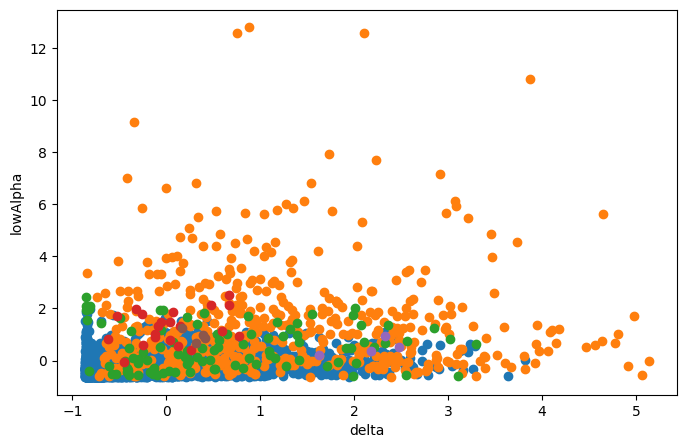

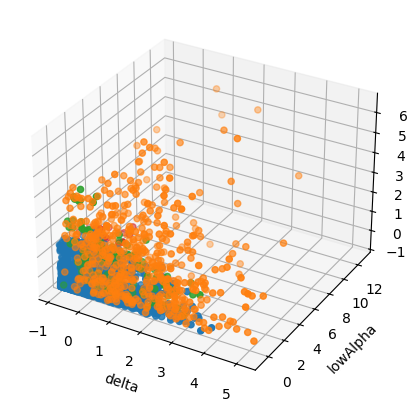

In [71]:
# Scratch

dbscan_scratch.plot2D("delta", "lowAlpha")
dbscan_scratch.plot3D("delta", "lowAlpha", "highGamma")

### 3.2.3 Principal Component Analysis

#### ~ [PCA] From Scratch

#### ~ [PCA] Library